In [97]:
from time import time
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [98]:
def unsafe_hash(input_string):
    """안전하지 않은 해시 함수 예시: 입력 문자열의 ASCII 코드 값의 합을 반환"""
    return sum(ord(char) for char in input_string)

In [99]:
# 숫자에 대한 평균 시간 저장
average_times = []

for num_digits in range(1, 8):  # 1자리부터 8자리 숫자
    digit_times = []

    for _ in range(5):  # 각 자리수별로 5번 시도
        # 자리수에 맞는 한 개의 무작위 숫자 생성
        random_number = random.randint(10**(num_digits-1), 10**num_digits - 1)
        start_time = time()
        
        gt_hash_val = unsafe_hash(str(random_number).zfill(num_digits))
        for i in range(10**num_digits):
            if unsafe_hash(str(i).zfill(num_digits)) == gt_hash_val:
                print("plaintext : ",random_number )
                print("candidate : ",str(i).zfill(num_digits) )
                print()
                
                end_time = time()
                break
                
        digit_times.append(end_time - start_time)

    # 자리수별 평균 시간 계산
    average_time = sum(digit_times) / len(digit_times)
    average_times.append(average_time)

plaintext :  9
candidate :  9

plaintext :  1
candidate :  1

plaintext :  7
candidate :  7

plaintext :  4
candidate :  4

plaintext :  8
candidate :  8

plaintext :  23
candidate :  05

plaintext :  67
candidate :  49

plaintext :  93
candidate :  39

plaintext :  95
candidate :  59

plaintext :  60
candidate :  06

plaintext :  904
candidate :  049

plaintext :  623
candidate :  029

plaintext :  469
candidate :  199

plaintext :  607
candidate :  049

plaintext :  976
candidate :  499

plaintext :  6529
candidate :  0499

plaintext :  3663
candidate :  0099

plaintext :  8865
candidate :  0999

plaintext :  3917
candidate :  0299

plaintext :  5277
candidate :  0399

plaintext :  29518
candidate :  00799

plaintext :  22054
candidate :  00049

plaintext :  80442
candidate :  00099

plaintext :  32738
candidate :  00599

plaintext :  51746
candidate :  00599

plaintext :  449316
candidate :  000999

plaintext :  297754
candidate :  007999

plaintext :  212911
candidate :  000079

pl

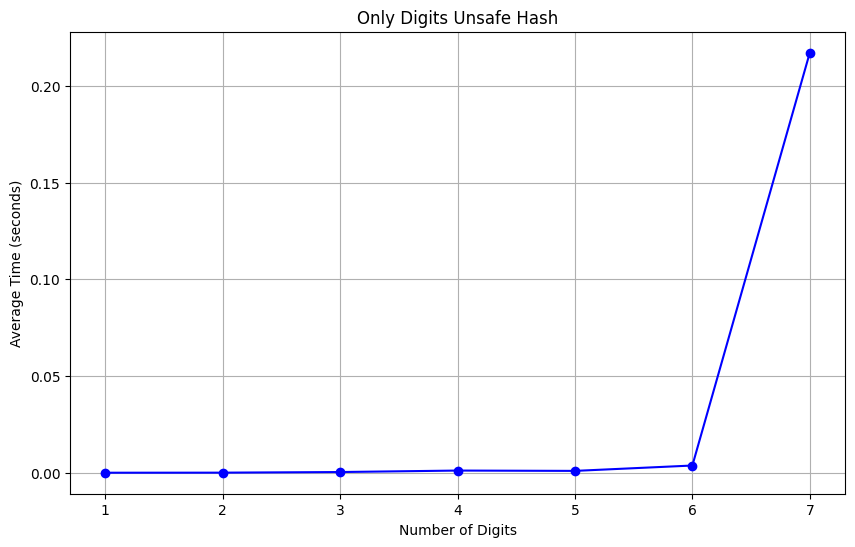

[0.00010581016540527344, 0.00013837814331054687, 0.0004588127136230469, 0.0012217044830322265, 0.0010530471801757813, 0.0038256168365478514, 0.2170839786529541]


In [100]:
# 결과 그래프로 표현
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), average_times, marker='o', linestyle='-', color='blue')
plt.title('Only Digits Unsafe Hash')
plt.xlabel('Number of Digits')
plt.ylabel('Average Time (seconds)')
plt.xticks(range(1, 8))
plt.grid(True)
plt.show()
print(average_times)

In [101]:
def number_to_letter(number):
    if 0 <= number <= 25:
        # 숫자가 0-25인 경우, 대문자 A-Z로 변환
        return chr(number + 65)
    elif 26 <= number <= 51:
        # 숫자가 26-51인 경우, 소문자 a-z로 변환
        # 26을 빼주어 0-25 범위로 조정하고, 소문자 시작 ASCII 코드인 97을 더합니다.
        return chr((number - 26) + 97)
    else:
        # 유효하지 않은 숫자일 경우
        return None

In [102]:
# 문자열 길이별로 해시 충돌 검증 시간의 평균을 저장할 리스트
average_times_per_length = []

for string_length in range(1, 5):  # 1자리부터 5자리까지 알파벳 문자열에 대한 처리
    times = []  # 각 문자열 길이별 시도에 대한 시간을 저장
    
    for _ in range(5):  # 각 문자열 길이에 대해 5번 반복
        # 문자열 길이에 맞는 단 하나의 무작위 문자열 생성
        random_string = ''.join(number_to_letter(random.randint(0, 51)) for _ in range(string_length))
        total_time = 0

        # 해시 충돌 검증 시작
        gt_hash_val = unsafe_hash(random_string)
        start_time = time()
        
        for i in range(52**string_length):
            # i를 현재 길이의 알파벳 문자열로 변환
            candidate = ''.join(number_to_letter((i // (52**j)) % 52) for j in range(string_length-1, -1, -1))
            if unsafe_hash(candidate) == gt_hash_val:
                print("plaintext : ",random_string )
                print("candidate : ",candidate )
                print()
                total_time += (time() - start_time)
                break
        
        times.append(total_time)
    
    # 문자열 길이별 평균 시간 계산 및 저장
    average_time = sum(times) / len(times)
    average_times_per_length.append(average_time)

plaintext :  Y
candidate :  Y

plaintext :  d
candidate :  d

plaintext :  J
candidate :  J

plaintext :  W
candidate :  W

plaintext :  k
candidate :  k

plaintext :  bc
candidate :  Kz

plaintext :  Ri
candidate :  Az

plaintext :  dr
candidate :  au

plaintext :  mu
candidate :  hz

plaintext :  Mm
candidate :  Ay

plaintext :  jNq
candidate :  Anz

plaintext :  OGj
candidate :  AEz

plaintext :  KMA
candidate :  AAW

plaintext :  sgs
candidate :  Yzz

plaintext :  lzL
candidate :  Awz

plaintext :  GJwk
candidate :  AAwz

plaintext :  Mirf
candidate :  AYzz

plaintext :  CFbS
candidate :  AABz

plaintext :  NuVN
candidate :  AAkz

plaintext :  hIcB
candidate :  AAZz



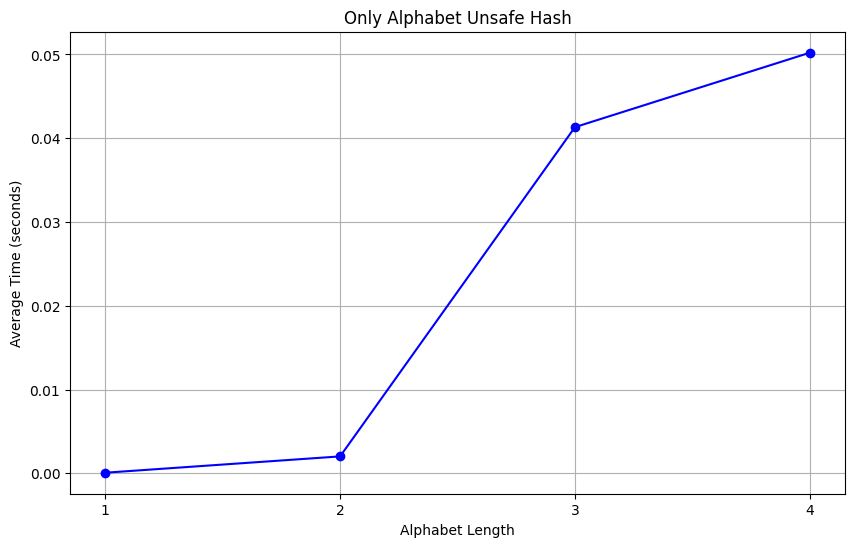

[6.82830810546875e-05, 0.0020172119140625, 0.041317987442016604, 0.05020041465759277]


In [103]:
# 결과 그래프로 표현
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), average_times_per_length, marker='o', linestyle='-', color='blue')
plt.title('Only Alphabet Unsafe Hash')
plt.xlabel('Alphabet Length')
plt.ylabel('Average Time (seconds)')
plt.grid(True)
plt.xticks(range(1, 5))
plt.show()
print(average_times_per_length)

In [104]:
def number_to_char(number):
    if 0 <= number <= 25:
        # 대문자 A-Z
        return chr(number + 65)
    elif 26 <= number <= 51:
        # 소문자 a-z
        return chr(number - 26 + 97)
    elif 52 <= number <= 61:
        # 숫자 0-9
        return chr(number - 52 + 48)
    else:
        return None


In [105]:
# 무작위 문자열 생성 함수
def generate_random_string(length):
    """주어진 길이에 대해 무작위 알파벳+숫자 문자열을 생성합니다."""
    return ''.join(number_to_char(random.randint(0, 61)) for _ in range(length))

# 문자열 길이별로 해시 충돌 검증 시간의 평균을 저장할 리스트
average_times_per_length = []

for string_length in range(1, 5):  # 1자리부터 4자리까지
    times = []  # 각 문자열 길이별 시도에 대한 시간을 저장

    for _ in range(20):  # 각 길이별로 5번 시도
        # 길이에 맞는 단 하나의 무작위 문자열 생성
        random_string = generate_random_string(string_length)
        start_time = time()

        s_hash_val = unsafe_hash(random_string)
        for i in range(62**string_length):
            # i를 현재 길이의 알파벳+숫자 문자열로 변환
            candidate = ''.join(number_to_char((i // (62**j)) % 62) for j in range(string_length-1, -1, -1))
            if unsafe_hash(candidate) == s_hash_val:
                print("plaintext : ",random_string )
                print("candidate : ",candidate )
                print()
                end_time = time()
                break

       
        times.append(end_time - start_time)

    # 길이별 평균 시간 계산 및 저장
    average_time = sum(times) / len(times)
    average_times_per_length.append(average_time)

plaintext :  d
candidate :  d

plaintext :  g
candidate :  g

plaintext :  Y
candidate :  Y

plaintext :  H
candidate :  H

plaintext :  U
candidate :  U

plaintext :  C
candidate :  C

plaintext :  A
candidate :  A

plaintext :  N
candidate :  N

plaintext :  t
candidate :  t

plaintext :  g
candidate :  g

plaintext :  T
candidate :  T

plaintext :  q
candidate :  q

plaintext :  i
candidate :  i

plaintext :  4
candidate :  4

plaintext :  k
candidate :  k

plaintext :  f
candidate :  f

plaintext :  g
candidate :  g

plaintext :  b
candidate :  b

plaintext :  G
candidate :  G

plaintext :  R
candidate :  R

plaintext :  8v
candidate :  Am

plaintext :  dz
candidate :  dz

plaintext :  Cn
candidate :  Ap

plaintext :  U4
candidate :  AH

plaintext :  3K
candidate :  E9

plaintext :  hv
candidate :  dz

plaintext :  T5
candidate :  AH

plaintext :  DS
candidate :  AV

plaintext :  od
candidate :  Yz

plaintext :  cn
candidate :  Wz

plaintext :  P6
candidate :  AE

plaintext :  vy
c

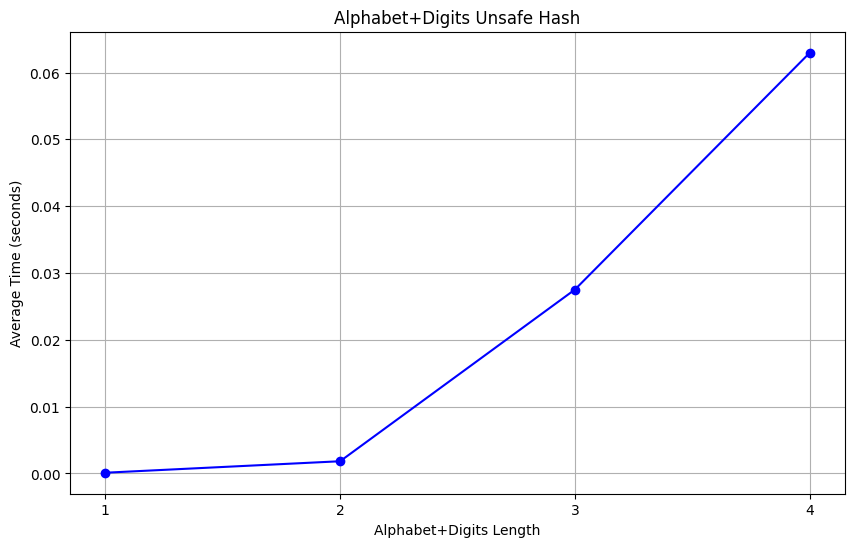

[0.00010274648666381836, 0.001820838451385498, 0.027523624897003173, 0.06297011375427246]


In [106]:
# 결과 그래프로 표현
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), average_times_per_length, marker='o', linestyle='-', color='blue')
plt.title('Alphabet+Digits Unsafe Hash')
plt.xlabel('Alphabet+Digits Length')
plt.ylabel('Average Time (seconds)')
plt.grid(True)
plt.xticks(range(1, 5))
plt.show()
print(average_times_per_length)

In [107]:
def number_to_char_ext(number):
    if 0 <= number <= 25:
        return chr(number + 65)  # 대문자 A-Z
    elif 26 <= number <= 51:
        return chr(number - 26 + 97)  # 소문자 a-z
    elif 52 <= number <= 61:
        return chr(number - 52 + 48)  # 숫자 0-9
    elif 62 <= number <= 71:
        return "!@#$%^&*()"[number - 62]  # 특수 문자
    else:
        return None

In [110]:
def generate_random_string_ext(length):
    """주어진 길이에 대해 무작위 알파벳, 숫자, 특수문자 문자열을 생성합니다."""
    return ''.join(number_to_char_ext(random.randint(0, 71)) for _ in range(length))

# 문자열 길이별로 해시 충돌 검증 시간의 평균을 저장할 리스트
average_times_per_length_ext = []

for string_length in range(1, 5):  # 1자리부터 3자리까지
    times = []  # 각 문자열 길이별 시도에 대한 시간을 저장
    
    for _ in range(20):  # 각 길이별로 5번 시도
        # 길이에 맞는 단 하나의 무작위 문자열 생성
        random_string = generate_random_string_ext(string_length)
        start_time = time()

        s_hash_val = unsafe_hash(random_string)
        for i in range(72**string_length):  # 알파벳 대소문자, 숫자, 특수문자 포함
            # i를 현재 길이의 문자열로 변환
            candidate = ''.join(number_to_char_ext((i // (72**j)) % 72) for j in range(string_length-1, -1, -1))
            if unsafe_hash(candidate) == s_hash_val:
                print("plaintext : ",random_string )
                print("candidate : ",candidate )
                print()
                end_time = time()
                break

        
        times.append(end_time - start_time)

    # 길이별 평균 시간 계산 및 저장
    average_time = sum(times) / len(times)
    average_times_per_length_ext.append(average_time)

plaintext :  h
candidate :  h

plaintext :  k
candidate :  k

plaintext :  d
candidate :  d

plaintext :  w
candidate :  w

plaintext :  m
candidate :  m

plaintext :  G
candidate :  G

plaintext :  &
candidate :  &

plaintext :  Q
candidate :  Q

plaintext :  U
candidate :  U

plaintext :  7
candidate :  7

plaintext :  &
candidate :  &

plaintext :  y
candidate :  y

plaintext :  v
candidate :  v

plaintext :  J
candidate :  J

plaintext :  R
candidate :  R

plaintext :  n
candidate :  n

plaintext :  O
candidate :  O

plaintext :  j
candidate :  j

plaintext :  e
candidate :  e

plaintext :  B
candidate :  B

plaintext :  Vx
candidate :  Tz

plaintext :  LR
candidate :  DZ

plaintext :  4t
candidate :  Ag

plaintext :  RY
candidate :  Aj

plaintext :  N$
candidate :  A1

plaintext :  A2
candidate :  A2

plaintext :  i9
candidate :  Aa

plaintext :  ^6
candidate :  AS

plaintext :  b!
candidate :  AB

plaintext :  Uo
candidate :  Jz

plaintext :  hv
candidate :  dz

plaintext :  cP
c

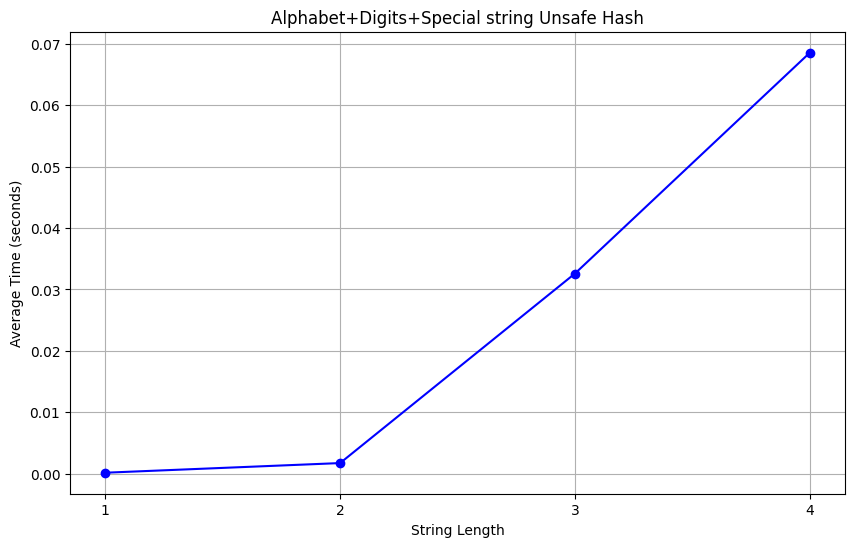

[0.00010274648666381836, 0.001820838451385498, 0.027523624897003173, 0.06297011375427246]


In [111]:
# 결과 그래프로 표현
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), average_times_per_length_ext, marker='o', linestyle='-', color='blue')
plt.title('Alphabet+Digits+Special string Unsafe Hash')
plt.xlabel('String Length')
plt.ylabel('Average Time (seconds)')
plt.grid(True)
plt.xticks(range(1, 5))
plt.show()
print(average_times_per_length)